**Importing the necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

**Creating the dataset of size [200 , 2] with mean of both the features = 0 and variance of the diagonal element (3 , 2) and covariance of non diagonal elements(2 , 2)**

In [2]:
np.random.seed(42)
mean = [0 , 0]
cov = [[3 , 2] , [2 , 2]]
X = np.random.multivariate_normal(mean = mean , cov = cov , size = 200)

**Performing PCA**

In [4]:
pca = PCA(n_components = 2) # n_components = No: of dimentions you want to keep
X_pca = pca.fit_transform(X)

In [5]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [6]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

In [7]:
projection_pc1 = np.dot(X , components[0])
projection_pc2 = np.dot(X , components[1])

In [9]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

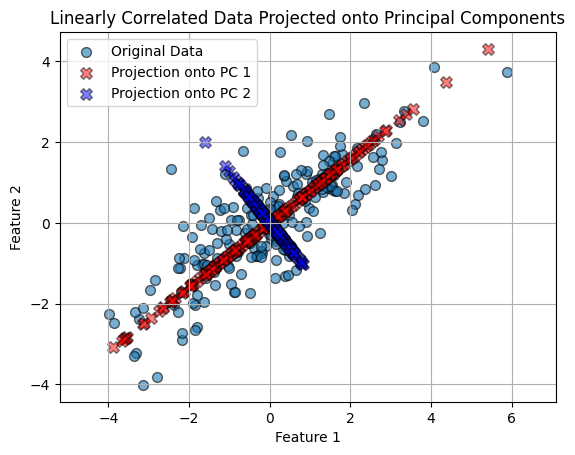

In [11]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**PCA for dimentionality reduction**

In [14]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [15]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

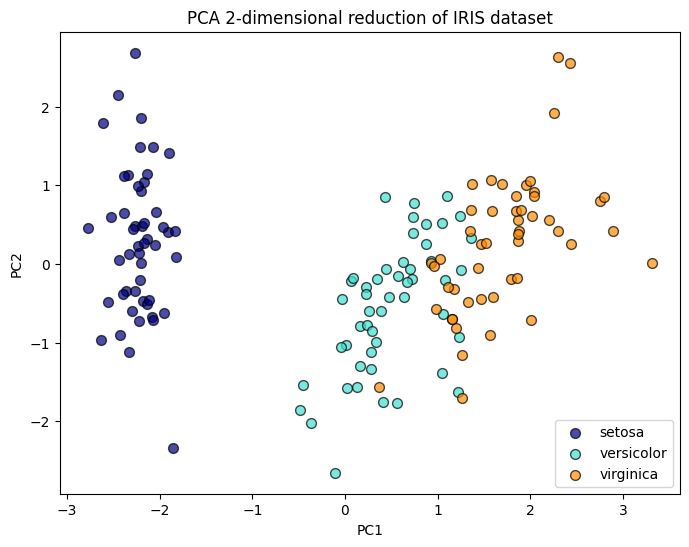

In [17]:
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
plt.show()